In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/diet_data.csv')
df.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,8/22/2018,11.0,13.0,0.0,2672.0,2300.0,0.86,1.0,1.0,1.0,0.0,0.0,0.0,-26.0
1,9/26/2018,11.0,13.0,2.0,2674.0,2300.0,0.86,0.0,1.0,0.0,0.0,1.0,1.0,6.0
2,12/10/2018,12.0,2.0,0.0,2720.0,2200.0,0.81,1.0,1.0,0.0,0.0,0.0,1.0,-44.0
3,12/5/2018,11.0,13.0,0.0,2672.0,2150.0,0.80,1.0,0.0,1.0,0.0,0.0,1.0,-14.0
4,11/10/2018,11.0,13.0,8.0,2680.0,3600.0,1.34,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
df.shape

(151, 14)

In [6]:
df[df.isnull().any(axis=1)].count()

Date           10
Stone           2
Pounds          2
Ounces          2
weight_oz       9
calories        0
cals_per_oz     7
five_donuts     0
walk            0
run             0
wine            0
prot            0
weight          0
change          7
dtype: int64

In [7]:
df = df.dropna()
df.shape

(140, 14)

In [8]:
df.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,11.542857,6.157143,3.585714,2687.700000,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,0.499949,5.664824,2.913589,28.663189,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,11.000000,0.000000,0.000000,2628.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,11.000000,1.000000,0.000000,2670.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.000000,4.000000,2689.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


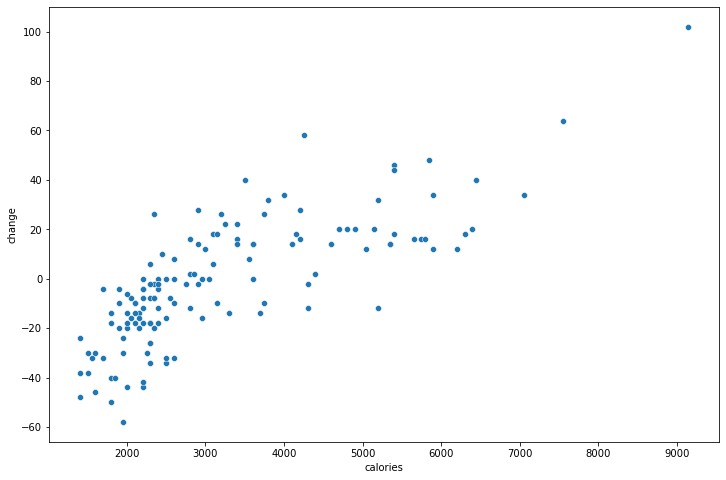

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(x='calories', y='change', data=df, ax=ax);

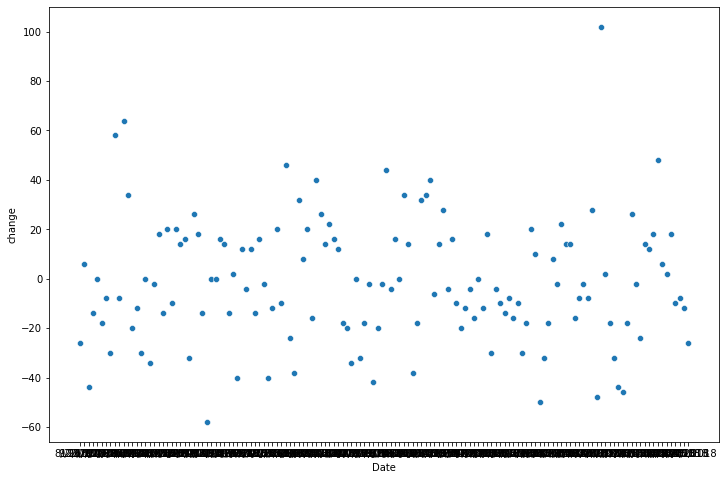

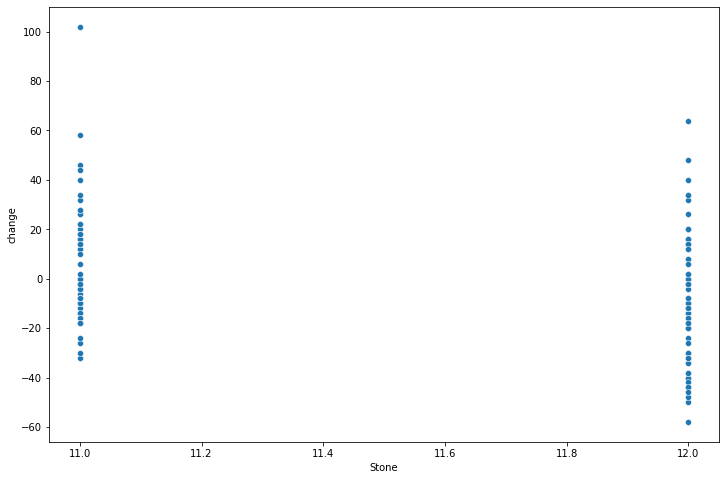

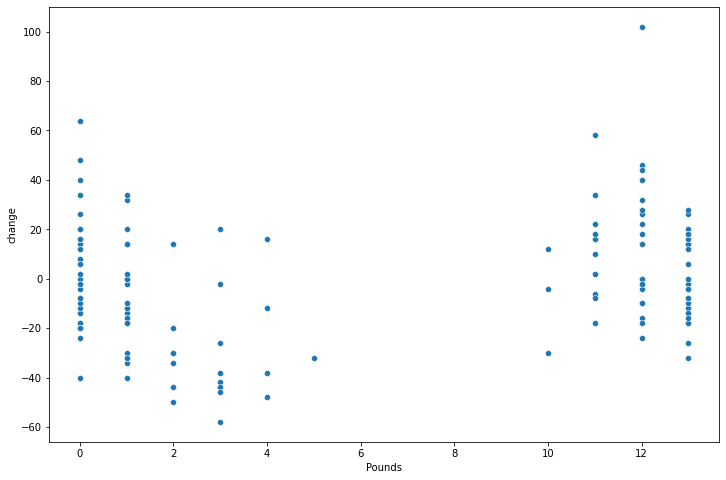

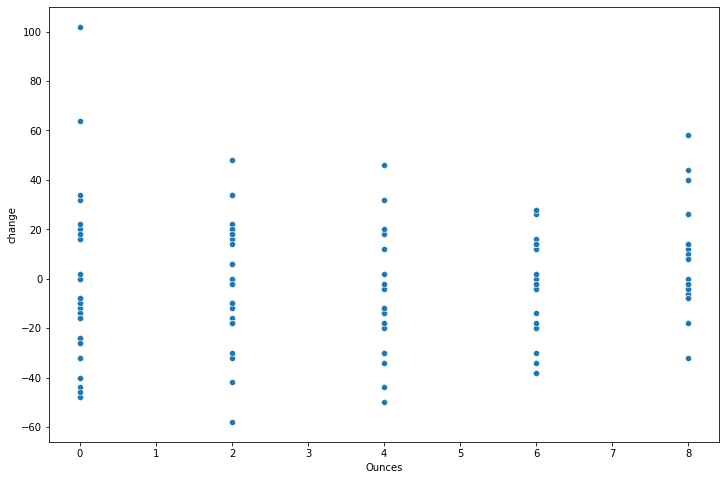

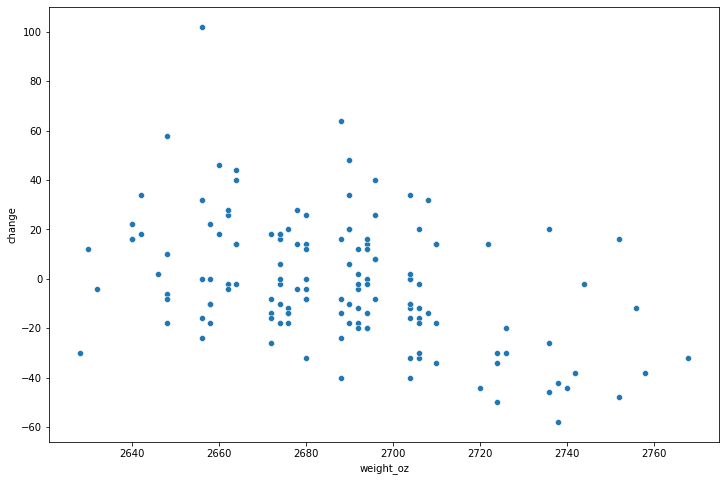

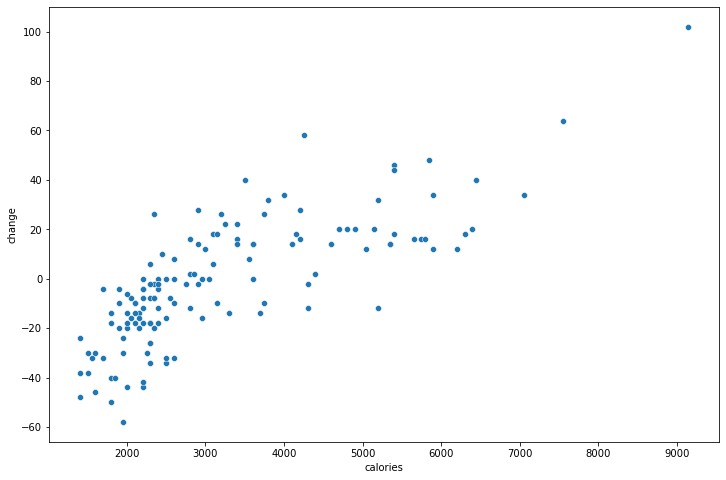

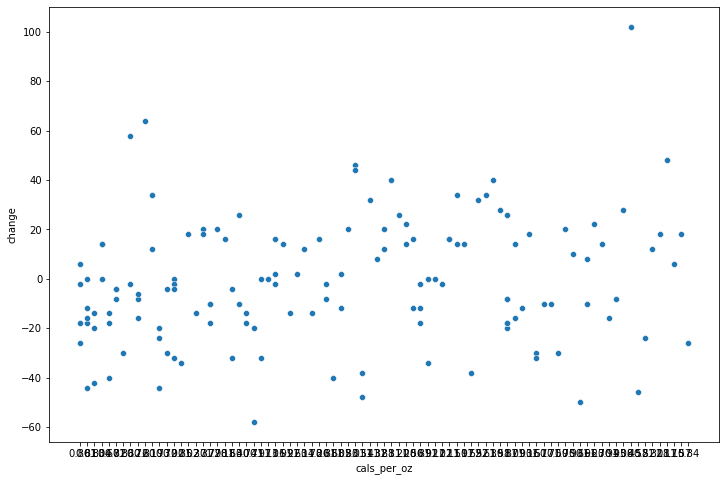

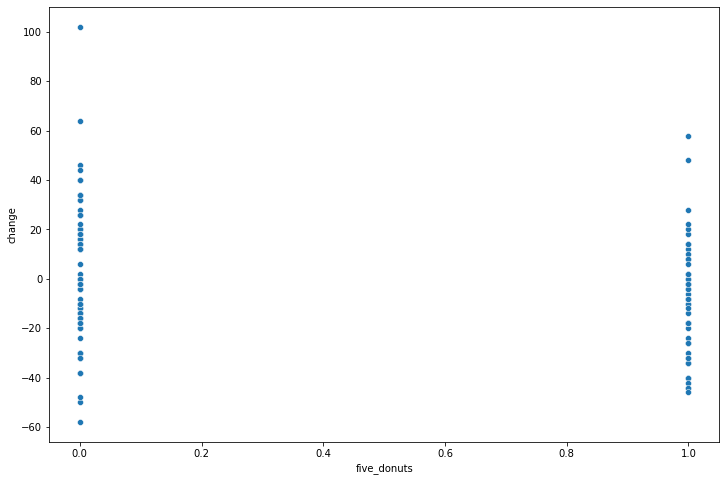

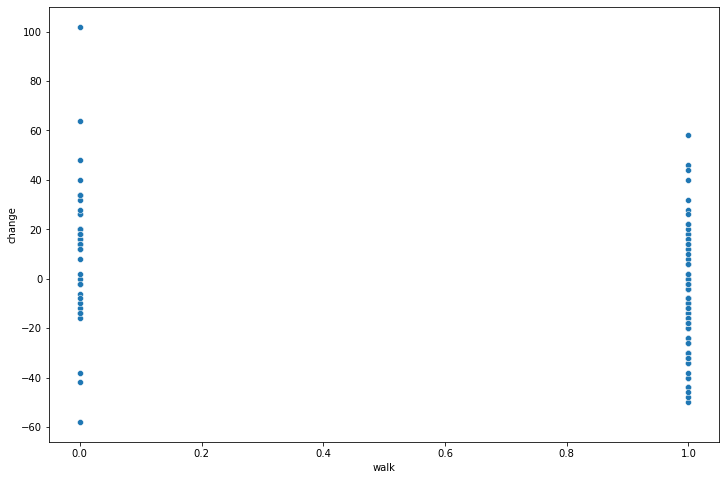

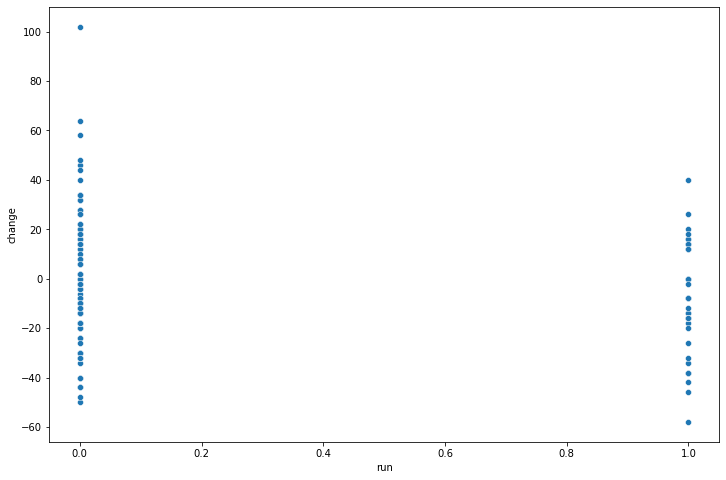

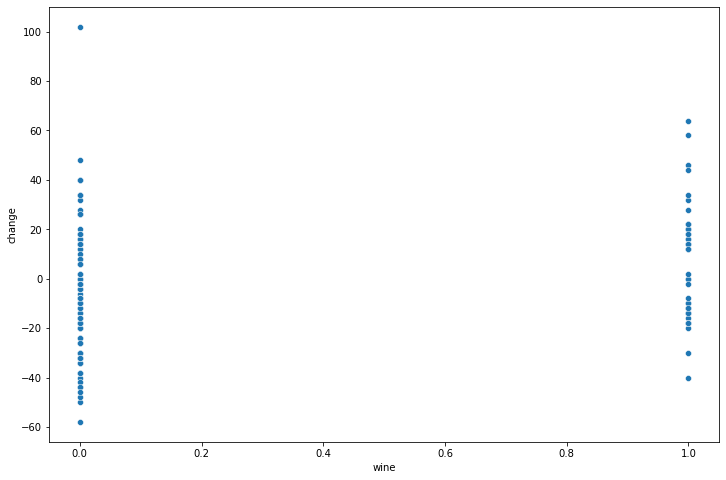

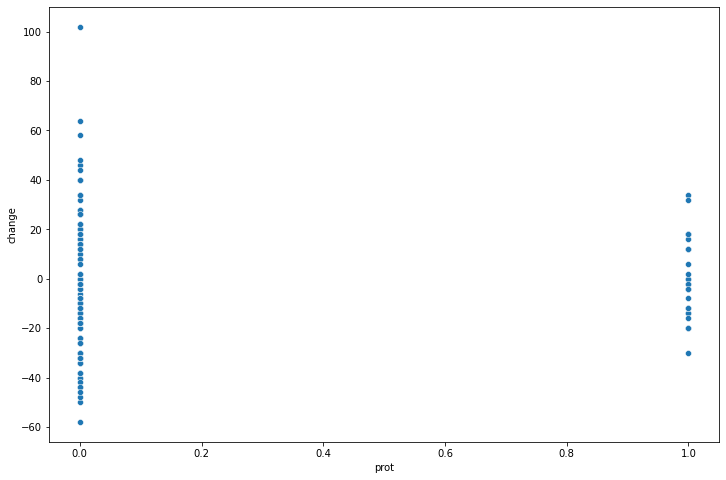

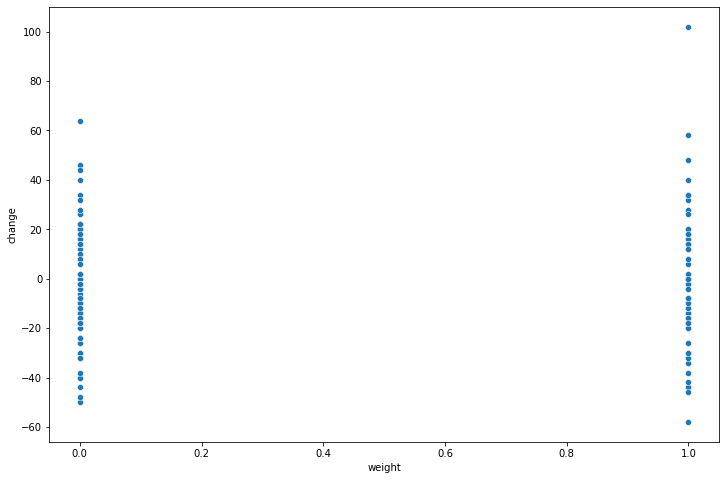

In [10]:
for col in df.columns[:-1]:
    fig, ax = plt.subplots(figsize=(12, 8))

    sns.scatterplot(x=col, y='change', data=df, ax=ax);

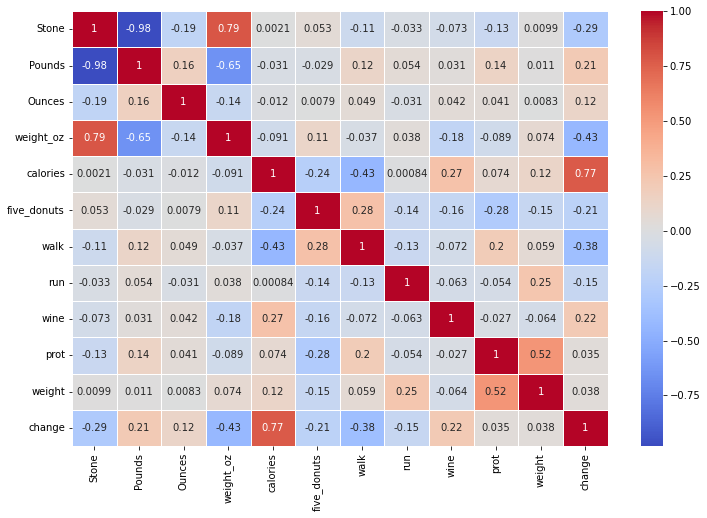

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5);

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['change', 'Date', 'Stone', 'Pounds', 'Ounces'], axis=1)
y = df['change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.neural_network import MLPRegressor

In [17]:
mlp_reg = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1, ),
    solver='lbfgs',
    verbose=True,
    max_iter=100
)
mlp_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(1,), max_iter=100, solver='lbfgs',
             verbose=True)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = mlp_reg.predict(X_test_scaled)
print(f'R2 score: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

R2 score: 0.57
MSE: 364.48
RMSE: 19.09


In [19]:
mlp_reg.score(X_test_scaled, y_test)

0.5724762441846957

In [20]:
mlp_reg.score(X_train_scaled, y_train)

0.7389820192272278

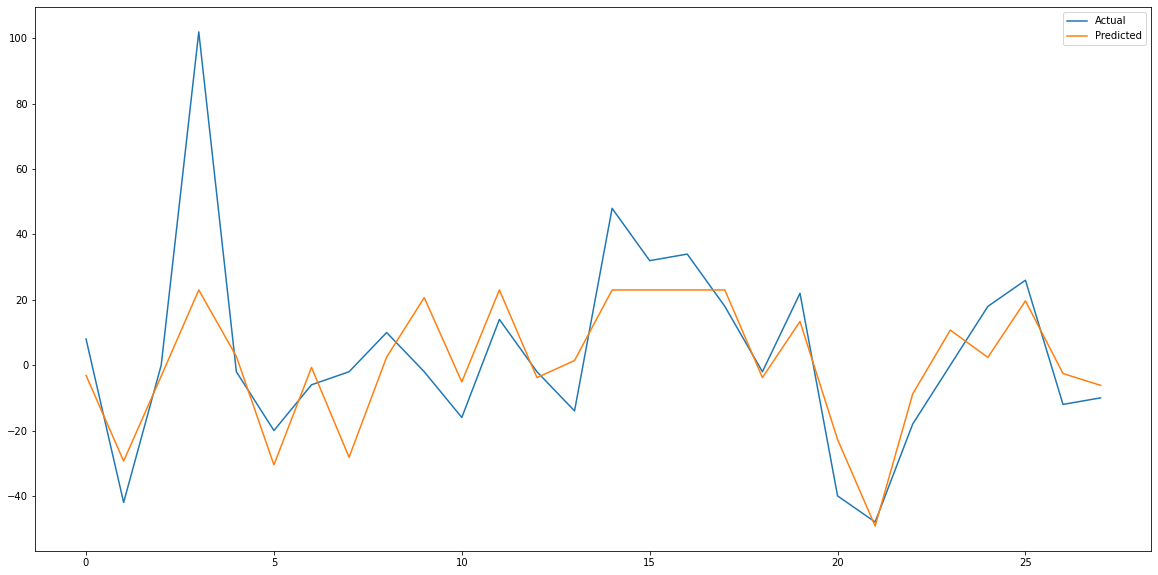

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show();

Training R2 score: 0.89
Test R2 score: 0.72
MSE: 234.77
RMSE: 15.32


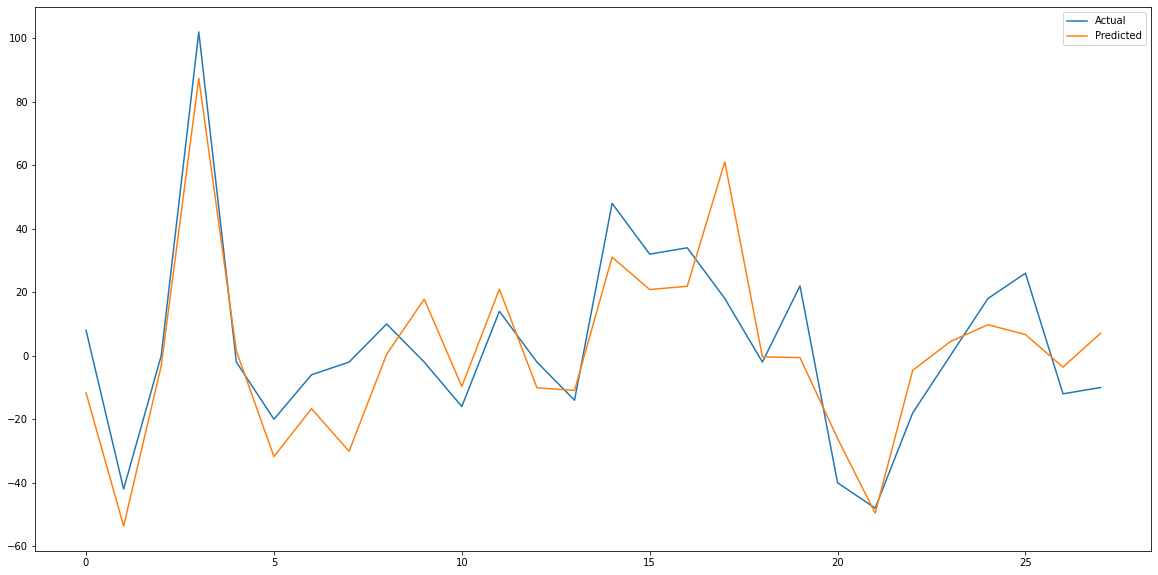

In [25]:
mlp_reg = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(5, ),
    solver='lbfgs',
    verbose=True,
    max_iter=1000
)
mlp_reg.fit(X_train_scaled, y_train)
y_pred = mlp_reg.predict(X_test_scaled)
print(f'Training R2 score: {r2_score(y_train, mlp_reg.predict(X_train_scaled)):.2f}')
print(f'Test R2 score: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show();

Training R2 score: 0.79
Test R2 score: 0.74
MSE: 222.18
RMSE: 14.91


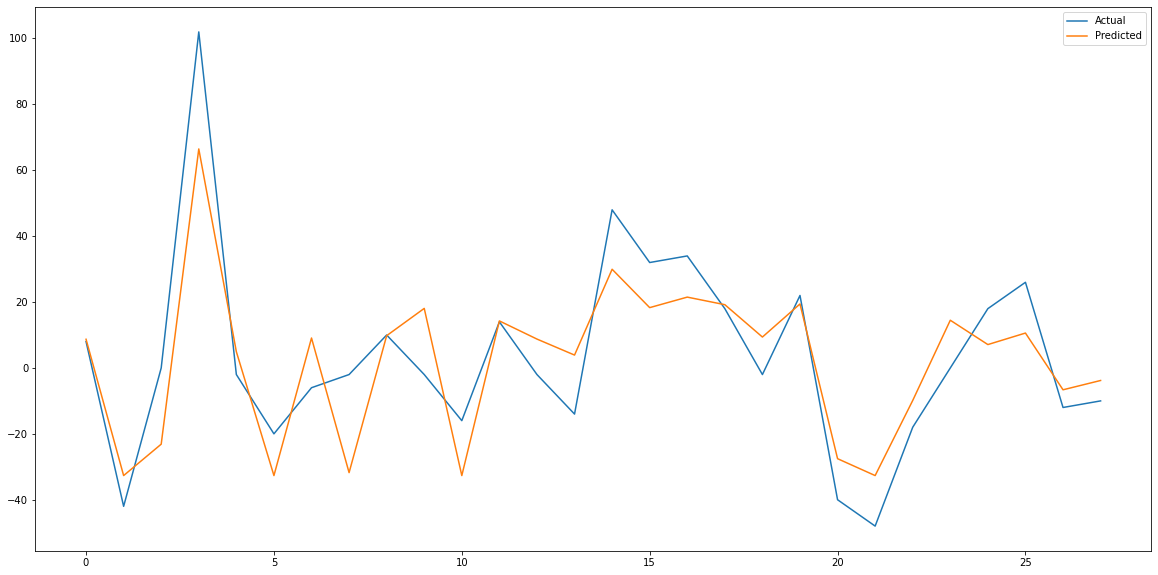

In [26]:
mlp_reg = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(2, 4),
    solver='lbfgs',
    verbose=True,
    max_iter=1000
)
mlp_reg.fit(X_train_scaled, y_train)
y_pred = mlp_reg.predict(X_test_scaled)
print(f'Training R2 score: {r2_score(y_train, mlp_reg.predict(X_train_scaled)):.2f}')
print(f'Test R2 score: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show();

Training R2 score: 0.78
Test R2 score: 0.54
MSE: 392.96
RMSE: 19.82


C:\Users\Safiuddin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


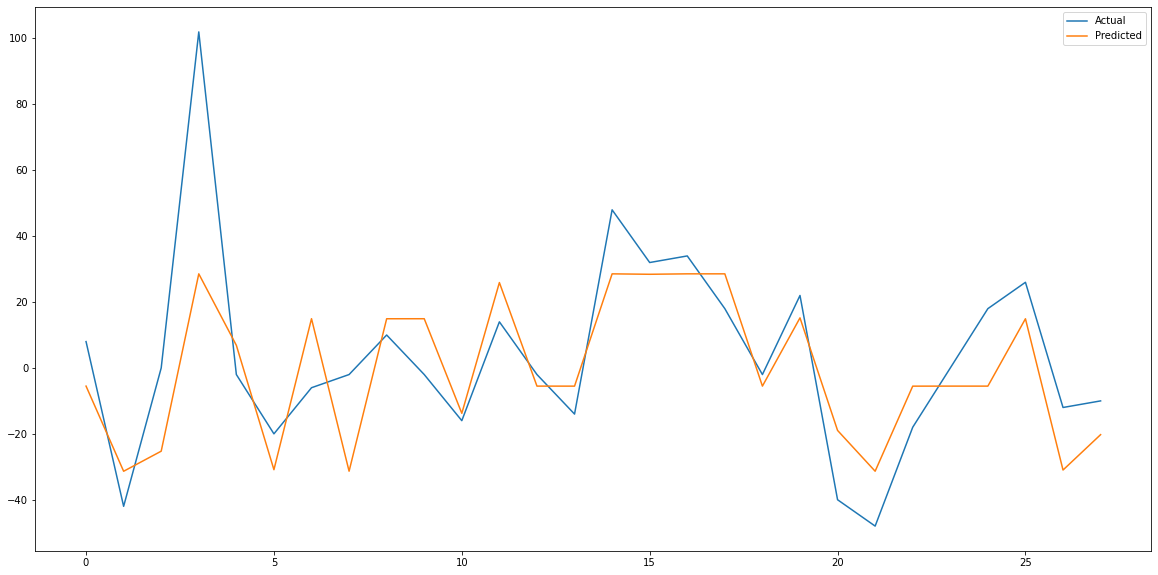

In [28]:
mlp_reg = MLPRegressor(
    activation='logistic',
    hidden_layer_sizes=(2, 4),
    solver='lbfgs',
    verbose=True,
    max_iter=5000
)
mlp_reg.fit(X_train_scaled, y_train)
y_pred = mlp_reg.predict(X_test_scaled)
print(f'Training R2 score: {r2_score(y_train, mlp_reg.predict(X_train_scaled)):.2f}')
print(f'Test R2 score: {r2_score(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show();